<a href="https://colab.research.google.com/github/siddub123/ML_Projects/blob/main/Insurance_predict_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Importing the dependencies


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# data colletion and preprocessing


In [66]:
ins=pd.read_csv('/content/insurance.csv')

In [67]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [68]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
ins.shape

(1338, 7)

In [70]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [71]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [72]:
ins.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [73]:
sns.set()

<ipython-input-74-97a4ccc5860b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ins['age'])


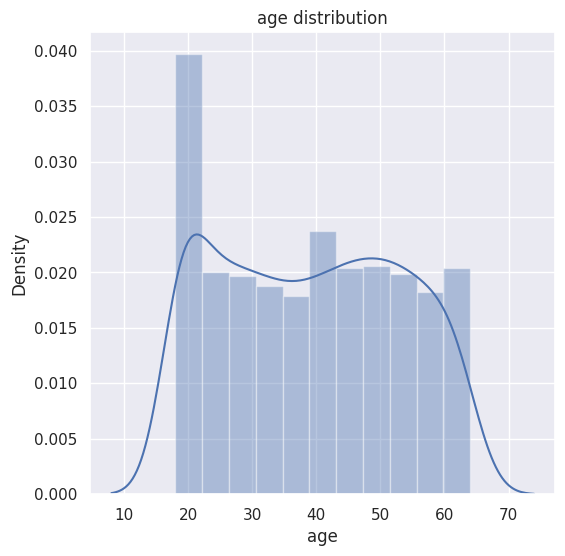

In [74]:
#  Age wise distribution
plt.figure(figsize=(6,6))
sns.distplot(ins['age'])
plt.title('age distribution')
plt.show()

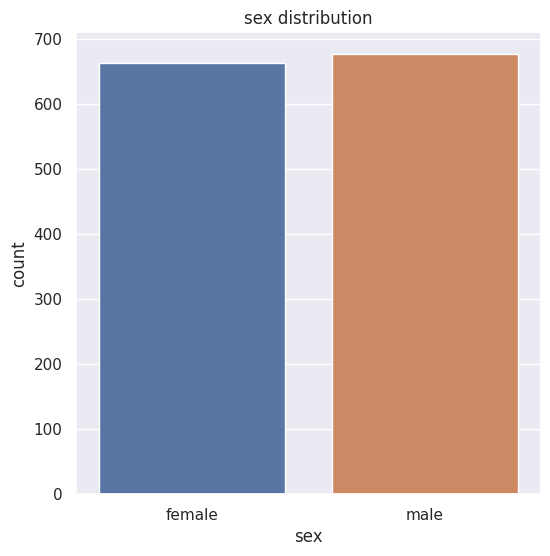

In [75]:
 # number of male and female

 plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=ins)
plt.title('sex distribution')
plt.show()

<ipython-input-93-1d623b631cb7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ins['bmi'])


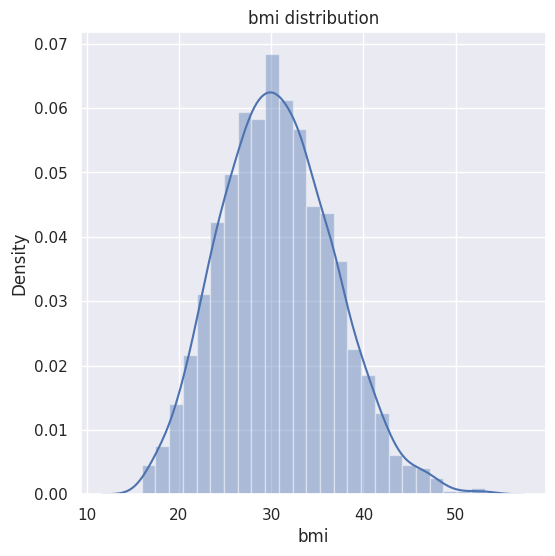

In [93]:
# body mass index distribution

plt.figure(figsize=(6,6))
sns.distplot(ins['bmi'])
plt.title('bmi distribution')
plt.show()

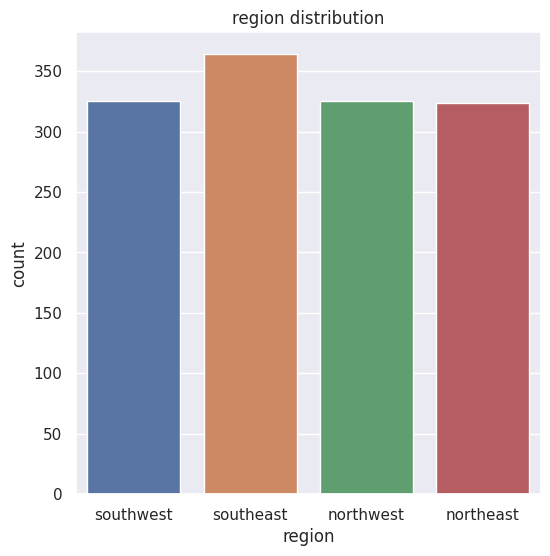

In [77]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=ins)
plt.title('region distribution')
plt.show()

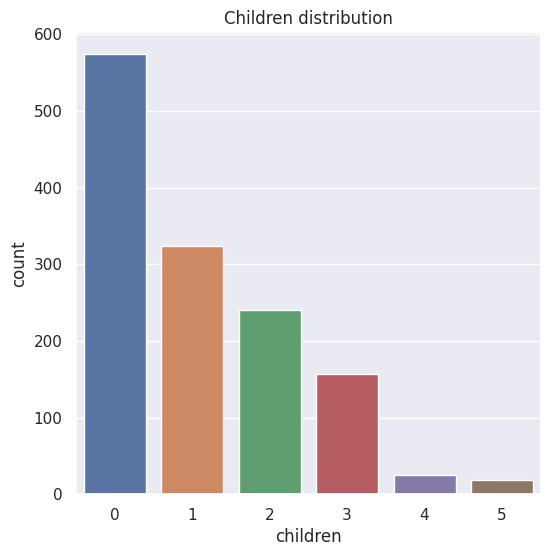

In [78]:
# the total number of childrens

plt.figure(figsize=(6,6))
sns.countplot(x='children',data=ins)
plt.title('Children distribution')
plt.show()

In [79]:
ins['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

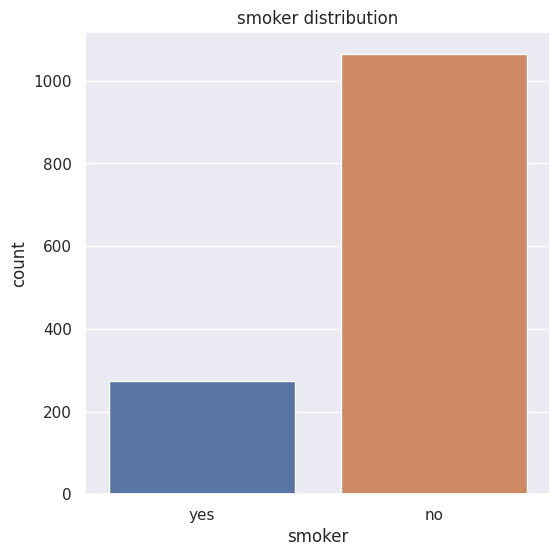

In [80]:

# Total number of smokers and non smokers

plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=ins)
plt.title('smoker distribution')
plt.show()

In [81]:
ins['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<ipython-input-95-1c824ef1b18a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ins['charges'])


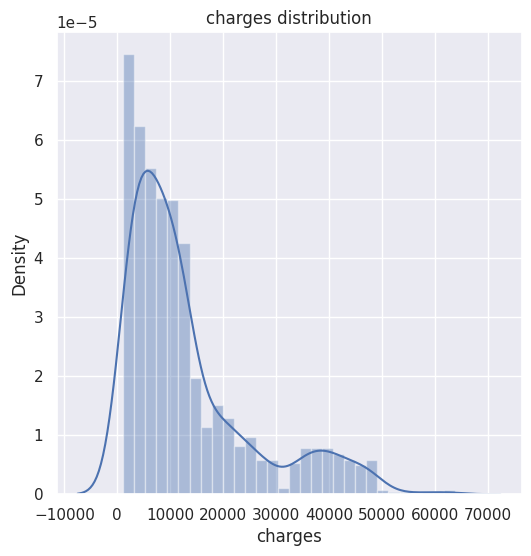

In [95]:
# Total charge distribution

plt.figure(figsize=(6,6))
sns.distplot(ins['charges'])
plt.title('charges distribution')
plt.show()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Data Preprocessing

In [84]:
ins.replace({'sex':{'male':0,'female':1}},inplace=True)
ins

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [85]:
# one hot encoding

ins.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [86]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,northwest,10600.54830
1334,18,1,31.920,0,1,northeast,2205.98080
1335,18,1,36.850,0,1,southeast,1629.83350
1336,21,1,25.800,0,1,southwest,2007.94500


In [87]:
# ne hot encoding for regions


ins.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [88]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


# splitting the features and target

In [89]:
x = ins.drop(columns ='charges',axis = 1)
y = ins['charges']

In [90]:
print(x)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [91]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [92]:
y=y.round()
print(y)

0       16885.0
1        1726.0
2        4449.0
3       21984.0
4        3867.0
         ...   
1333    10601.0
1334     2206.0
1335     1630.0
1336     2008.0
1337    29141.0
Name: charges, Length: 1338, dtype: float64


In [151]:
x_train,x_test,y_tain,y_test = train_test_split(x,y,test_size=0.2,random_state =2)
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# applying the Algorithm

In [156]:
 regressor = LinearRegression()
 regressor.fit(x_train,y_tain)

LinearRegression()

In [162]:
#  Accuary with training data set
train_pred =regressor.predict(x_train)
r2_train=metrics.r2_score(y_tain,train_pred)
print('r squared valur:',r2_train)

r squared valur: 0.7515059180289971


In [137]:
# accuracy with testing dataset
 test_pred =regressor.predict(x_test)
r2_test=metrics.r2_score(y_test,test_pred)
print('R squared valur:',r2_test*100 )

R squared valur: 74.47268304326671


# Buiding predictive system

In [138]:
regressor=LinearRegression()

In [169]:
input_data = (31,1,25,74,0,1)
stored_numpy_array= np.asarray(input_data)

In [170]:
input_data_reshaped = stored_numpy_array.reshape(1,-1)

In [172]:
prediction = regressor.predict(input_data_reshaped)
print(prediction)

[70595.71913481]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


                                            # END